# K Nearest Neighbors Project 

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
knn_df = pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [4]:
knn_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Below is a pairplot of the data using seaborn:

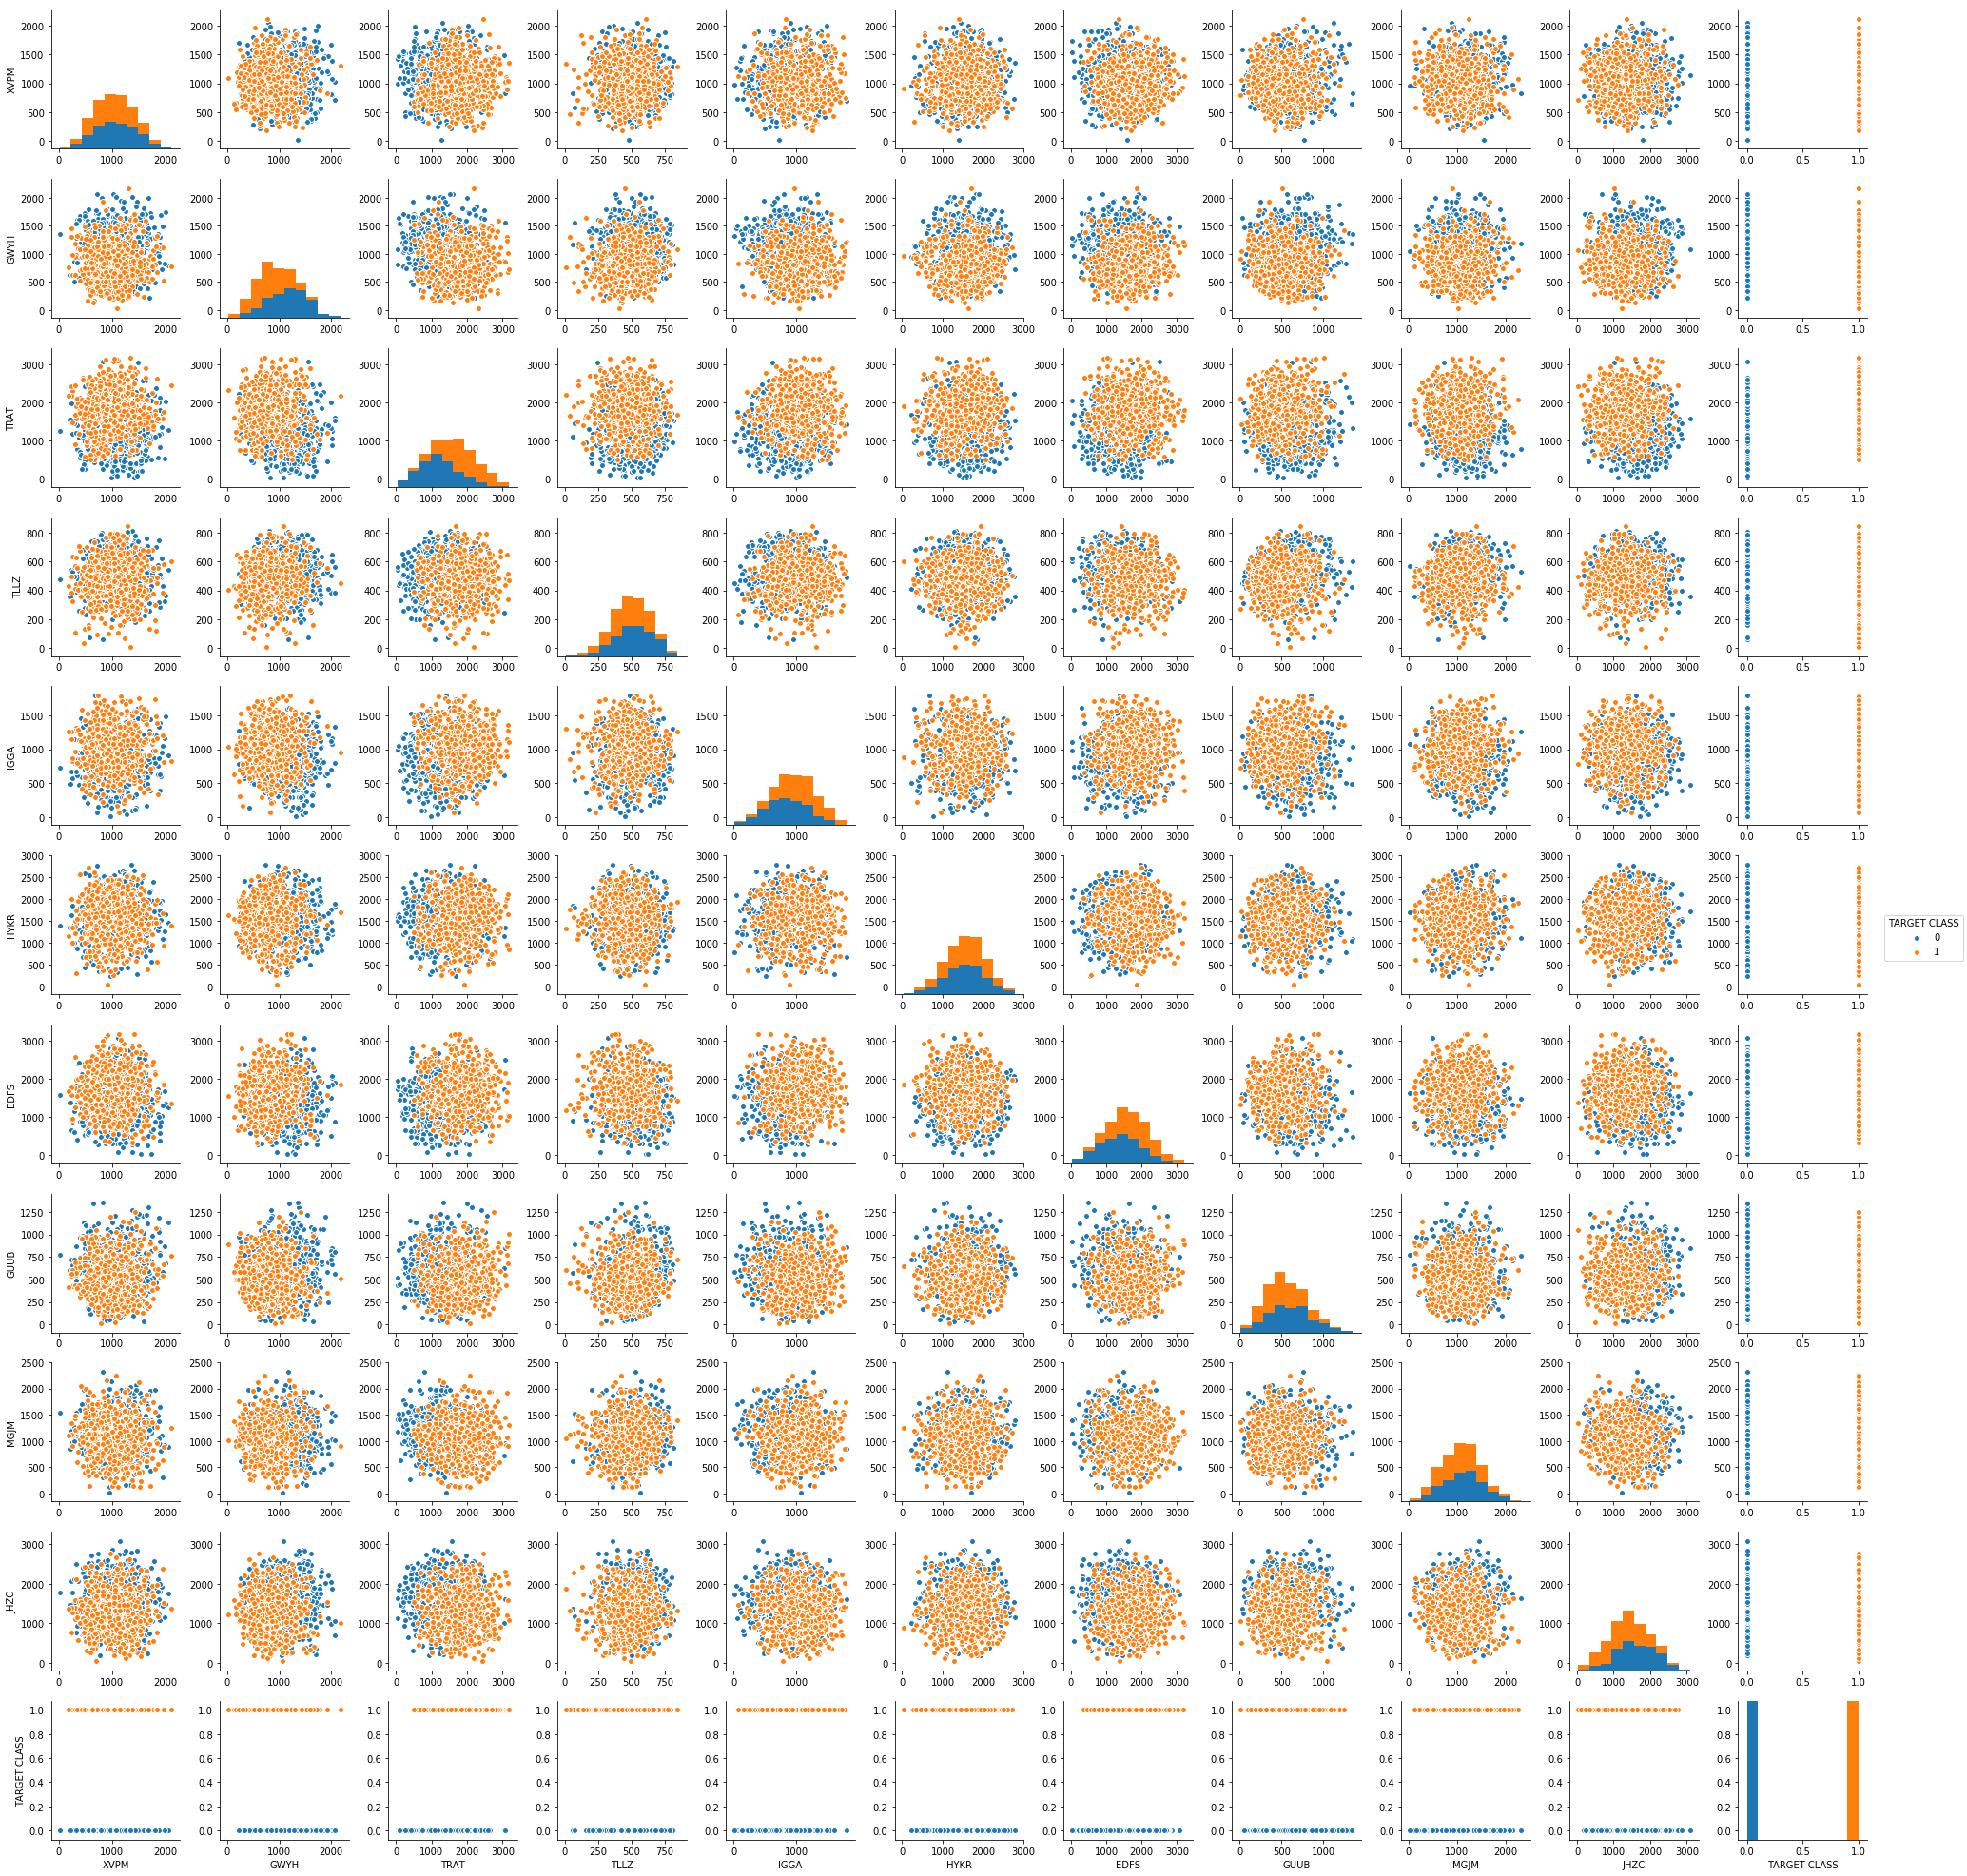

In [5]:
sns.pairplot(data=knn_df, hue='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables:

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
knn_df_notc = knn_df.drop('TARGET CLASS', axis=1)
scaler.fit(knn_df_notc)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(knn_df_notc)

In [10]:
df_scale = pd.DataFrame(scaled_features, columns=knn_df.columns[:-1])
df_scale.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split


In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
X = df_scale
y = knn_df['TARGET CLASS']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

# Using KNN


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Here I evaluate the KNN model:

In [17]:
predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test,predictions))

[[109  43]
 [ 41 107]]


In [21]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



# Choosing a K Value
Here I use the elbow method to pick a good K Value. I store the error rate in an array, then plot it against the iteration. We can see which K value provides the lowest error rate, and choose that:

In [29]:
error_rate = []
for i in range(1,40):
    knn_loop = KNeighborsClassifier(n_neighbors=i)
    knn_loop.fit(X_train,y_train)
    pred_i = knn_loop.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

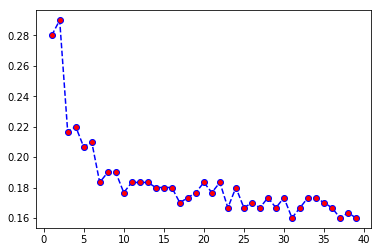

In [30]:
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red')

## Retrain with new K Value


In [31]:
knn_new = KNeighborsClassifier(n_neighbors=31)
knn_new.fit(X_train, y_train)
pred_new = knn_new.predict(X_test)

print(confusion_matrix(y_test,pred_new))
print('/n')
print(classification_report(y_test,pred_new))

[[123  29]
 [ 19 129]]
/n
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       152
          1       0.82      0.87      0.84       148

avg / total       0.84      0.84      0.84       300

